# 频率主义 vs 贝叶斯主义 III：置信(Confidence)与可信(Credibility)，频率主义与科学，不能混为一谈

*这个notebook出自[Pythonic Perambulations](http://jakevdp.github.io)的[博文](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/) . The content is BSD licensed.*

*这个系列共4个部分：中文版[Part I](http://muxuezi.github.io/posts/frequentism-and-bayesianism-chs)  [Part II](http://muxuezi.github.io/posts/frequentism-and-bayesianism-chs-ii)  [Part III](http://muxuezi.github.io/posts/frequentism-and-bayesianism-chs-iii)  [Part IV](http://muxuezi.github.io/posts/frequentism-and-bayesianism-chs-iv)，英文版[Part I](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)  [Part II](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/)  [Part III](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)  [Part IV](http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/)*

<!-- TEASER_END -->

在道格拉斯·亚当斯(Douglas Adams)的经典著作*《银河系漫游指南》*中，有一种超智慧生物(老鼠)建造了一部超级电脑，名深思(Deep Thought)，它们问超级电脑，“生命、宇宙以及任何事情的终极答案是什么”。经过750万年的计算，深思告诉老鼠的答案是：

**42**

失望的工程师们，折腾了一辈子就等到这样的回答，都呆住了。他们不停的追问深思更多的信息，最后深思说：“只要理解了问题的本质，你就能找到答案。”

也就是说，如果你不明白问题，那么答案也不会靠谱。

我觉得这个故事在科学统计工作中是个恰当的比喻。当估计未知参数时，频率论方法倾向于**置信区间(confidence interval)** (CI)，而贝叶斯理论则用**可信范围(credible region)** (CR)。尽管听起来没啥区别，但是在处理一些基本问题时，两者的差异变得至关重要。

就像道格拉斯·亚当斯宇宙中可怜的生命希望得到启示(enlightenment)，科学家们常常想运用频率主义获得正确结果，但这么做却忽略了科学的事实，那就是**频率主义通常在回答错误的问题**。这绝不是简单的纸上谈兵：只要我明白了观察数据，就可以从中获得正确的答案。

# 置信 vs. 可信

在[第一节](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)中，我们讨论了频率主义与贝叶斯主义基本理论的差异：频率论认为概率是**重复事件(假设)发生的频率**；贝叶斯认为概率是**数值的可信程度**。更一般的结论是，频率论认为**模型参数是固定的，而数据是随机的**，而贝叶斯认为**模型参数是随机的，而数据是固定的**。

基础理论的差异影响两种方法选择模型参数数据边界的方式。因为差异很小，我就用一个简单的例子来论述一下频率论置信区间与贝叶斯可信范围的差异。

# 例 1: 正态分布均值

让我们用一个简单的例子来验证一下；此例同[第一节](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) 中计算正态分布均值。 之前我们简单的分析了(频率论) 最大似然估计和(贝叶斯) 最大后验估计(posteriori estimates)；这里我们拓展一下：看看频率论置信区间与贝叶斯可信范围的差异。

问题是：你在观察一颗星星，你认为它的亮度是恒定的。为了简化，我们可以认为其亮度就是每秒到达我们望远镜的光量子数量。任何观察值都会有误差：虽然在此例中这些误差并不重要，但是我们假设观察值$x_i$服从正态分布，且标准差已知为$\sigma_x$。

对一组观察值，亮度置信水平95%(即2\sigma$)的置信区间是多少？

## 1. 频率论方法

这个问题是频率论方法的经典案例，分析如下：

对任意$N$个值的$D = \{x_i\}_{i=1}^N$，分布的无偏估计均值$\mu$是 

$$
\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i
$$

**样本分布(sampling)**描述了均值估计的频率；通过中心极限定理(central limit theorem)我们可以得出样本分布是正态分布：

$$
f(\bar{x}~||~\mu) \propto \exp\left[\frac{-(\bar{x} - \mu)^2}{2\sigma_\mu^2}\right]
$$

这里我们使用**均值标准误差(standard error of the mean)**,

$$
\sigma_\mu = \sigma_x / \sqrt{N}
$$

中心极限定理告诉我们如果$N$足够大，任何分布都可以得到合理的近似值；如果分布呈正态分布，$N$就可以缩小到2。

让我们赶紧来验证这条经验，看看5组$10^6$个样本的均值情况：

In [1]:
import numpy as np

N = 5
Nsamp = 10 ** 6
sigma_x = 2

np.random.seed(0)
x = np.random.normal(0, sigma_x, size=(Nsamp, N))
mu_samp = x.mean(1)
sig_samp = sigma_x * N ** -0.5

print("{0:.3f} should equal {1:.3f}".format(np.std(mu_samp), sig_samp))

0.894 should equal 0.894


如前所述，观察值的标准差等于$\sigma_x N^{-1/2}$。

从样本的正态分布中，我们可以轻易得出95%置信水平下的置信区间(想想那条钟形线)：

$$
CI_{\mu} =  \left(\bar{x} - 2\sigma_\mu,~\bar{x} + 2\sigma_\mu\right)
$$

我们再看看：如果现在三个观察值标准差($\sigma_x$)是10。那么均值的95%置信区间是多少？

我们假设真实值是100:

In [2]:
true_B = 100
sigma_x = 10

np.random.seed(1)
D = np.random.normal(true_B, sigma_x, size=3)
print(D)

[ 116.24345364   93.88243586   94.71828248]


下面我们创建一个函数来算置信区间：

In [3]:
from scipy.special import erfinv

def freq_CI_mu(D, sigma, frac=0.95):
    """Compute the confidence interval on the mean"""
    # we'll compute Nsigma from the desired percentage
    Nsigma = np.sqrt(2) * erfinv(frac)
    mu = D.mean()
    sigma_mu = sigma * D.size ** -0.5
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu

print("95% Confidence Interval: [{0:.0f}, {1:.0f}]".format(*freq_CI_mu(D, 10)))

95% Confidence Interval: [90, 113]


注意我们假设$\sigma_x$是已知的，这可以通过均值$\mu$来估计，但这里简单起见。

## 2. 贝叶斯方法

用贝叶斯方法就得从贝叶斯定理开始：

$$
P(\mu~|~D) = \frac{P(D~|~\mu)P(\mu)}{P(D)}
$$

我们对$\mu$用扁平先验(flat prior) (如，整个区间满足$P(\mu) \propto 1$) ，然后用似然估计

$$
P(D~|~\mu) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_x^2}}\exp\left[\frac{(\mu - x_i)^2}{2\sigma_x^2}\right]
$$

计算乘积然后进行变换，可以得出

$$
P(\mu~|~D) \propto \exp\left[\frac{-(\mu - \bar{x})^2}{2\sigma_\mu^2}\right]
$$

也可以看作是均值为$\bar{x}$，标准差为$\sigma_\mu$的正态分布。

也就是说，**此例中$\mu$的贝叶斯后验结果等于频率论的样本分布均值$\mu$**。

从后验结果可以计算出贝叶斯可信范围是95%可能的最短区间。看起来和频率论的置信区间很像：

$$
CR_{\mu} =  \left(\bar{x} - 2\sigma_\mu,~\bar{x} + 2\sigma_\mu\right)
$$

我们设计一个函数来解叶斯可信范围：

In [4]:
def bayes_CR_mu(D, sigma, frac=0.95):
    """Compute the credible region on the mean"""
    Nsigma = np.sqrt(2) * erfinv(frac)
    mu = D.mean()
    sigma_mu = sigma * D.size ** -0.5
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu

print("95% Credible Region: [{0:.0f}, {1:.0f}]".format(*bayes_CR_mu(D, 10)))

95% Credible Region: [90, 113]


## 到底有啥区别？

上面的论证过程就是频率论置信区间与贝叶斯可信范围令人混乱的地方。在很多简单问题中，它们完全相等。但是我们必须清楚一点：**数量相等，但是含义不同**。

贝叶斯的概率反映我们相信的程度。所以当我们计算可信范围时，其实就是

> “对这个观察数据，真实值$\mu$会落在可信范围$CR_\mu$(固定的)内有95%的可能性”——贝叶斯主义

而频率论认为$\mu$是一个固定值，而数据(以及所有数据派生的变量，包括置信区间的边界)是随机的。因此，频率论置信区间就是

> “当我们从这些数据(而不是那些数据)中计算$CI_\mu$时，有95%的可能性，真实值$\mu$会落在$CI_\mu$内”——频率主义

注意区别：贝叶斯方法是对具有固定边界的参数值的概率表述(a statement of probability about the parameter value given fixed bounds)，而频率论方法是对固定参数值的边界的概率表述(a probability about the bounds given a fixed parameter value.)。

差别很小，但是我们下面会讲，这将造成极大差距。首先，让我们进一步用仿真方法来验证。

### 确定贝叶斯可信范围

确定贝叶斯可信范围，步骤如下：

1. 先验样本均值$\mu$是随机的
2. 每个$\mu$有随机的数据集合
3. 选取符合观察值的数据点
3. 看看哪些$\mu$的值落在我们的可信范围内

代码如下：

In [5]:
# first define some quantities that we need 
Nsamples = 2E7
N = len(D)
sigma_x = 10

# if someone changes N, this could easily cause a memory error
if N * Nsamples > 1E8:
    raise ValueError("Are you sure you want this many samples?")
    
# eps tells us how close to D we need to be to consider
# it a matching sample. The value encodes the tradeoff
# between bias and variance of our simulation
eps = 0.5

# Generate some mean values from the (flat) prior in a reasonable range
np.random.seed(0)
mu = 80 + 40 * np.random.random(Nsamples)

# Generate data for each of these mean values
x = np.random.normal(mu, sigma_x, (N, Nsamples)).T

# find data which matches our "observed" data
x.sort(1)
D.sort()
i = np.all(abs(x - D) < eps, 1)
print("number of suitable samples: {0}".format(i.sum()))

number of suitable samples: 528


In [6]:
# Now we ask how many of these mu values fall in our credible region
mu_good = mu[i]
CR = bayes_CR_mu(D, 10)
within_CR = (CR[0] < mu_good) & (mu_good < CR[1])
print "Fraction of means in Credible Region: {0:.3f}".format(within_CR.sum() * 1. / within_CR.size)

Fraction of means in Credible Region: 0.949


跟想的一样，95%可能的$\mu$的值落在我们的可信范围内。

这里，关键是明白哪些变量是随机的，哪些是固定的。在贝叶斯方法中，我们**从我们的数据里计算出一个单独的可信范围**，然后我们把它当作是**$\mu$的多个随机点画出的图像**。

### 确定频率论置信区间

确定频率论置信区间有点小复杂，步骤如下：

1. 从唯一的真实值$\mu$定义的分布中画出数据集合
2. 对每组数据，计算一个新的置信区间
3. 看看哪些置信区间包含$\mu$

代码如下：

In [7]:
# define some quantities we need
N = len(D)
Nsamples = 1E4
mu = 100
sigma_x = 10

# Draw datasets from the true distribution
np.random.seed(0)
x = np.random.normal(mu, sigma_x, (Nsamples, N))

# Compute a confidence interval from each dataset
CIs = np.array([freq_CI_mu(Di, sigma_x) for Di in x])

# find which confidence intervals contain the mean
contains_mu = (CIs[:, 0] < mu) & (mu < CIs[:, 1])
print "Fraction of Confidence Intervals containing the mean: {0:.3f}".format(contains_mu.sum() * 1. / contains_mu.size)

Fraction of Confidence Intervals containing the mean: 0.951


跟想的一样，95%置信区间包含μ的真实值。

同理，关键是明白哪些变量是随机的，哪些是固定的。我们把**唯一值$\mu$**看作是**多个随机样本中的不同置信区间构成的**。

## 讨论

我们应该再一次提醒自己两者的差异：

- 贝叶斯方法固定了可信范围，保证$\mu$95%的可能值落在可信范围内。
- 频率论方法固定了参数$\mu$， 保证95%置信区间包含$\mu$。

比较上面两者的结论，我们会发现两者源自概率定义的区别。

- 贝叶斯主义认为参数 (如$\mu$) 是随机变量，而频率主义认为是固定的。
- 贝叶斯主义认为观察值(如$D$)是固定的，而频率主义认为是随机变量。
- 贝叶斯主义认为参数约束(parameter constraints，如$CR_\mu$)是固定的，而频率主义认为(如$CI_\mu$)是是随机变量。

很多简单问题都和上面的例子一样，置信水平和可信范围完全相等，所以这种差异一般不太重要。但是，科学计算不是简单问题；下面我们就看个复杂的例子，来感受一下这种差异。

# 例 2：Jaynes截断分布(Truncated Exponential)

要找一个呈现两者差异的例子，我打算用E.T. Jaynes，一个20世纪的物理学家，做了大量统计工作。在他的书*Confidence Intervals vs. Bayesian Intervals* ([pdf](http://bayes.wustl.edu/etj/articles/confidence.pdf))中第15个例子，他用了一个截断分布。他是这么说的：

> 一个设备，因为注入了一种防护性化学试剂(protective chemical inhibitor)，所以在$\theta$时间内运行正常；但是在$\theta$时间之后，化学试剂用光了，问题就出现了，而且失败次数呈指数分布。没有办法直接观察化学试剂消耗的情况；只能观察到失败的结果。从实际观察数据中，估计$\theta$时间以确保运行安全......

从下面的模型可以获得一个数据$D$：

$$
p(x~|~\theta) = \left\{
\begin{array}{lll}
\exp(\theta - x) &,& x > \theta\\
0                &,& x < \theta
\end{array}
\right\}
$$

这里$p(x~|~\theta)$表示时间$x$失败的概率，化学试剂可用时间$\theta$。
观察数据$D = \{x_i\}$，我们的目标是估计$\theta$。

我们先为$\theta=10$画个图看看：

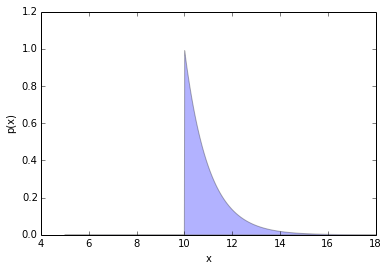

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def p(x, theta):
    return (x > theta) * np.exp(theta - x)

x = np.linspace(5, 18, 1000)
plt.fill(x, p(x, 10), alpha=0.3)
plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('p(x)');

现在我们的观察数据是$D = \{10, 12, 15\}$，我们想从这些数据中推断$\theta$。下面用四种方法来探索。

## 1. 常识(Common Sense)方法

我认为：遇到问题，计算之前，先想想怎么下手，并猜一猜结果。我们现在开始。想想这个问题，从概率分布的截断可以得出一个简单的观察结果：**$\theta$必须小于观察值的最小值**。

这是显而易见的：看到一个小于$\theta$的观察值概率为0。因此，假如我们假设正确，那么一个$\theta$大于任何观察值的模型是不可能出现的。贝叶斯主义和频率主义的基本假设都是模型正确，因此我们可以直接写出常识条件：

$$
\theta < \min(D)
$$

或者，特别地，$D = \{10, 12, 15\}$,

$$
\theta < 10
$$

这组数据中，$\theta$的每一个合理约束都应该满足以上条件。带着这条规则，我们继续用贝叶斯主义和频率主义进行定量分析。

## 2. 频率论方法 #1：正态分布近似的样本分布

在频率论方法中，我们要计算$\theta$的置信区间，可以通过观察值的计算均值开始

$$
\begin{array}{ll}
E(x) &= \int_0^\infty xp(x)dx\\
     &= \theta + 1
     \end{array}
$$

因此，用样本均值作为$E(x)$的点估计值， 就得到$\theta$的无偏估计(unbiased estimator)

$$
\hat{\theta} = \frac{1}{N} \sum_{i=1}^N x_i - 1
$$

指数分布的标准差为1，所以当$N$组够大，我们就可以用均值的标准差来表示$\hat{\theta}$的样本分布情况，将满足方差$\sigma^2 = 1 / N$的正态分布。因此，我们可以写出95% (就是2$\sigma$)的置信区间为

$$
CI_{\rm large~N} = \left(\hat{\theta} - 2 N^{-1/2},~\hat{\theta} + 2 N^{-1/2}\right)
$$

写成函数代码如下：

In [9]:
from scipy.special import erfinv

def approx_CI(D, sig=0.95):
    """Approximate truncated exponential confidence interval"""
    # use erfinv to convert percentage to number of sigma
    Nsigma = np.sqrt(2) * erfinv(sig)
    D = np.asarray(D)
    N = D.size
    theta_hat = np.mean(D) - 1
    return [theta_hat - Nsigma / np.sqrt(N),
            theta_hat + Nsigma / np.sqrt(N)]

In [10]:
D = [10, 12, 15]
print("approximate CI: ({0:.1f}, {1:.1f})".format(*approx_CI(D)))

approximate CI: (10.2, 12.5)


这里有个问题。通过我们简单的常识，我们认为$\theta$不可能大于10，但是上面的范围依然是95%置信区间。可能观察数据应该太少了： 上面的计算应该基于一个大的$N$ ，而我们用的是一个很小的$N = 3$。我们用更多的计算来试试看：

## 3. 频率论方法 #2：精确的样本分布

用精确的样本分布计算置信区间需要费一番功夫：

对较小的$N$，正态分布近似是不能用的，我们必须用真实的样本分布计算置信区间，就是$N$个变量的均值的分布取决于$p(\theta)$。随机变量的和服从单个变量的分布的卷积(convolution)，因此我们可以看看[卷积理论(convolution theorem)](http://en.wikipedia.org/wiki/Convolution_theorem)，再使用[特征方程(characteristic functions)](http://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)，来找到取决于$p(x~|~\theta)$的$N$个变量的和样本分布：

$$
f(\theta~|~D) \propto
\left\{
\begin{array}{lll}
z^{N - 1}\exp(-z) &,& z > 0\\
0 &,& z < 0
\end{array}
\right\}
;~ z = N(\hat{\theta} + 1 - \theta)
$$

要计算95%置信区间，我们要算累计分别函数：求$f(\theta~|~D)$从$0$到$\theta$的积分。如果我们使用[不完全Gamma方程(incomplete gamma function)](http://en.wikipedia.org/wiki/Incomplete_gamma_function)会容易点：

$$
\Gamma(a, x) = \int_x^\infty t^{a - 1}e^{-t} dt
$$

看起来和$f(\theta)$非常的像。

算出积分，我们就可以得出累计分布函数是：

$$
F(\theta~|~D) = \frac{1}{\Gamma(N)}\left[ \Gamma\left(N, \max[0, N(\hat{\theta} + 1 - \theta)]\right) - \Gamma\left(N,~N(\hat{\theta} + 1)\right)\right]
$$

一个连续的95%置信区间$(\theta_1, \theta_2)$满足下列方程：

$$
F(\theta_2~|~D) - F(\theta_1~|~D) = 0.95
$$

实际上有无限多组解，我们要的是最短的区间。我们可以增加两边概率密度相等的约束：

$$
f(\theta_2~|~D) = f(\theta_1~|~D)
$$

(Jaynes认为这一条确保区间是最短的，但是我(作者)不明白怎么证明)。其实因为正态分布钟形曲线的对称性，如果要达到同样的95%置信水平(概率)，也就是同样的面积，则越往中间则面积越大，区间越小。那么对称的区间的长度一定比同面积的非对称区间的长度都短。

解决这两个非线性方程的系统就可以得出置信区间。计算过程如下：

In [11]:
from scipy.special import gammaincc
from scipy import optimize


def exact_CI(D, frac=0.95):
    """Exact truncated exponential confidence interval"""
    D = np.asarray(D)
    N = D.size
    theta_hat = np.mean(D) - 1

    def f(theta, D):
        z = theta_hat + 1 - theta
        return (z > 0) * z ** (N - 1) * np.exp(-N * z)

    def F(theta, D):
        return gammaincc(N, np.maximum(0, N * (theta_hat + 1 - theta))) - gammaincc(N, N * (theta_hat + 1))
    
    def eqns(CI, D):
        """Equations which should be equal to zero"""
        theta1, theta2 = CI
        return (F(theta2, D) - F(theta1, D) - frac,
                f(theta2, D) - f(theta1, D))
    
    guess = approx_CI(D, 0.68) # use 1-sigma interval as a guess
    result = optimize.root(eqns, guess, args=(D,))
    if not result.success:
        print "warning: CI result did not converge!"
    return result.x

为了保证合理性(sanity check)，确保精确的与近似的置信区间在大量数据下是一致的：

In [12]:
np.random.seed(0)
Dlarge = 10 + np.random.random(500)
print "approx: ({0:.3f}, {1:.3f})".format(*approx_CI(Dlarge))
print "exact: ({0:.3f}, {1:.3f})".format(*exact_CI(Dlarge))

approx: (9.409, 9.584)
exact: (9.408, 9.584)


确实，在较大的$N$解出的精确区间与近似区间一致，这让我们确信我们的计算是正确的。

让我们回到之前3个点的数据集看看结果：

In [13]:
print("approximate CI: ({0:.1f}, {1:.1f})".format(*approx_CI(D)))
print("exact CI:       ({0:.1f}, {1:.1f})".format(*exact_CI(D)))

approximate CI: (10.2, 12.5)
exact CI:       (10.2, 12.2)


精确的置信区间与近似置信区间稍有不同，但是反映了同样的问题：**我们从常识推断$\theta$不能大于10，而95%的置信区间完全处于大于10的区间内**。这个置信区间看起来不太靠谱。

后面我们会仔细研究，现在我们看看贝叶斯的解决方法是不是更好。

## 4. 贝叶斯可信范围

首先我们用贝叶斯定理：

$$
p(\theta~|~D) = \frac{p(D~|~\theta)p(\theta)}{P(D)}
$$

用一个常量的$p(\theta)$，它的似然估计为

$$
p(D~|~\theta) = \prod_{i=1}^N p(x~|~\theta)
$$

可以得出

$$
p(\theta~|~D) \propto \left\{
\begin{array}{lll}
N\exp\left[N(\theta - \min(D))\right] &,& \theta < \min(D)\\
0                &,& \theta > \min(D)
\end{array}
\right\}
$$

其中，$\min(D)$是$D$的最小值， 之所以出现是因为$p(x~|~\theta)$的截断。
因为$p(\theta~|~D)$会指数增长到截断位置(cutoff)，所以最短的95%置信区间$(\theta_1, \theta_2)$就是

$$
\theta_2 = \min(D)
$$

而$\theta_1$就是下面方程的解

$$
\int_{\theta_1}^{\theta_2} N\exp[N(\theta - \theta_2)]d\theta = f
$$

算积分可以求解方程

$$
\theta_1 = \theta_2 + \frac{\log(1 - f)}{N}
$$

解法如下所示：

In [14]:
def bayes_CR(D, frac=0.95):
    """Bayesian Credibility Region"""
    D = np.asarray(D)
    N = float(D.size)
    theta2 = D.min()
    theta1 = theta2 + np.log(1. - frac) / N
    return theta1, theta2

贝叶斯方法就搞定了，下面我们来比较一下四种方法：

In [15]:
print("common sense:         theta < {0:.1f}".format(np.min(D)))
print("frequentism (approx): 95% CI = ({0:.1f}, {1:.1f})".format(*approx_CI(D)))
print("frequentism (exact):  95% CI = ({0:.1f}, {1:.1f})".format(*exact_CI(D)))
print("Bayesian:             95% CR = ({0:.1f}, {1:.1f})".format(*bayes_CR(D)))

common sense:         theta < 10.0
frequentism (approx): 95% CI = (10.2, 12.5)
frequentism (exact):  95% CI = (10.2, 12.2)
Bayesian:             95% CR = (9.0, 10.0)


我们会发现贝叶斯方法与常识是一致的，而频率论不靠谱。问题就是**频率主义一直回答错误的问题**。下面我会详谈，首先我们通过仿真来验证CI和CR的正确性。

## 数值方法验证

为了消除对数学的担忧，我想重复之前做过的事情，说明*前面的置信区间其实是正确的*。我们将用前面提到的方法，假设这个*真实*的$\theta$和具有同样分布的样本数据：

In [16]:
from scipy.stats import expon

Nsamples = 1000
N = 3
theta = 10

np.random.seed(42)
data = expon(theta).rvs((Nsamples, N))
CIs = np.array([exact_CI(Di) for Di in data])

# find which confidence intervals contain the mean
contains_theta = (CIs[:, 0] < theta) & (theta < CIs[:, 1])
print "Fraction of Confidence Intervals containing theta: {0:.3f}".format(contains_theta.sum() * 1. / contains_theta.size)

Fraction of Confidence Intervals containing theta: 0.953


按照频率主义的观点，计算出来的置信区间的95%可能是包含真实值的。我们计算置信区间的程序实际是正确的：数据其实是在另外的5%里面。但是：**我们从数据本身出发，发现我们真处于让CI失败的5%数据中**。标准的频率论置信区间理论忽略了这样的事实，那就是在处理任何问题时，常识都应该让你停止对置信区间的盲目依赖。

让我们检查一下贝叶斯可信区域的测试结果：

In [17]:
np.random.seed(42)
N = 1E7
eps = 0.1

theta = 9 + 2 * np.random.random(N)
data = (theta + expon().rvs((3, N))).T
data.sort(1)
D.sort()
i_good = np.all(abs(data - D) < eps, 1)

print("Number of good samples: {0}".format(i_good.sum()))

Number of good samples: 65


In [18]:
theta_good = theta[i_good]
theta1, theta2 = bayes_CR(D)

within_CR = (theta1 < theta_good) & (theta_good < theta2)
print("Fraction of thetas in Credible Region: {0:.3f}".format(within_CR.sum() * 1. / within_CR.size))

Fraction of thetas in Credible Region: 0.954


看，确实如此，~95%的$\theta$的数值落在我们通过单个数据样本计算的可信范围内。

# 频率主义回答错误问题

在例二中，我们演示了频率论方法是*技术正确的*，但是它违背我们的常识。到底是咋回事儿？

问题的关键是：**频率论置信区间给出正确答案的同时，通常是在回答错误的问题**。错误的问题就是频率论的*基础*——概率定义。

回想上面我对置信区间和可信范围的论述。贝叶斯主义说：

> "从观察到的数据来看，$\theta$的真实值有95%的可能性落在可信范围内" - 贝叶斯主义

而频率主义说：

> "当我用这组数据计算置信区间时，$\theta$有95%的可能在区间内" - 频率主义

想想看，假如你发现设备宕机了3次，你想估计$\theta$。我认为"这种数据"不是你的目标：你应该关心的是你可以从**这三次观察**中发现什么问题，而非观察的整个假设空间(not the entire hypothetical space of observations like them)。如前所述，如果你步频率论后尘去考虑"这种数据"，你就置身获得答案的绝境，从你观察到的特殊情况中得不到任何价值。

假如你想改变知道*从你观察到的数据中*，频率论置信区间可以告诉你什么。这就是答案：

> "*从观察到的数据来看*，$\theta$的真实值要么在置信区间里，要么不在里面" - 频率主义

这就是对你观察到的**这些数据**置信区间想说的，也能说的内容。当然，这看起来有点啰嗦，那么精简一点的说法就是:

> "*从观察到的数据来看*，我无法确定$\theta$值的范围" - 频率主义

如果你想从你观察到的数据中得到答案，频率主义是不靠谱的。

### 再坚持下哈... 这是不是有点过分苛责？

这么说可能有点苛刻，但是我想说这不是信口雌黄；这是关于频率主义的哲学立场和置信区间的定义的一个不争的事实。如果你想从观察到的数据中获得靠谱的结论(如置信区间和相关系数$p$值)，频率主义是相当不靠谱的。

不幸的是，整天在用频率论方法的很多人都没有意识到这些。我从天文学的案例中指明了这些，但是我并非要让大家难堪(他们很容易知道现在你要找什么)。很多科学家把置信区间当作贝叶斯可信范围，**但这明显是错的**。统计学外行可能会原谅对这一观点的忽略，但是专业的统计学家们也经常错误地解释置信区间。

我认为这个错误如此普遍的理由，是因为在很多小问题(如前所述)中，置信区间与可信范围恰好一致。这时，频率主义正确地回答了你的问题，**但是仅仅因为贝叶斯主义也给出了相同的结果**。(如果贝叶斯的结果不一样，频率论就错了。)

我绝非第一个这么说的人。物理学家[E.T. Jaynes](http://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes)是公认的贝叶斯捍卫者； 我的一个灵感来自他1976的论文*Confidence Intervals vs. Bayesian Intervals* ([pdf](http://bayes.wustl.edu/etj/articles/confidence.pdf))。最近，持同样观点的，还有统计学家与博主[W.M. Briggs](http://wmbriggs.com/) 在arX发表的博文[*再也别给非统计学人士讲频率主义了(It's Time To Stop Teaching Frequentism to Non-Statisticians)*](http://arxiv.org/abs/1201.2590)。还有[Savage](http://en.wikipedia.org/wiki/Leonard_Jimmie_Savage)， [Cornfield](http://en.wikipedia.org/wiki/Jerome_Cornfield)，以及20世纪的贝叶斯实践者们大量的著作言论。

那么，你还想用置信区间吗？可能在多个数据获取可以实现的情况下(如分析赌博赔率)，频率主义是有意义的。但是在大多数科学应用中，当你关心的是目前获取的数据可以告诉我们什么时，**频率主义只会回答错误的问题**。

# 本文的寓意：频率主义不能与科学混为一谈

本文的寓意就是频率主义不能与科学混为一谈。*在科学工作中，你要质疑对频率论的置信区间和p值的使用*。在科学研究时，置信区间和相关系数p值，为错误的问题提供了正确的答案。尤其是当你发现有人说95%置信区间就是对目标参数95%的确定时，**不要相信他们的解释和结论**。如果你是论文审稿人,**直接拒绝**。他们的数据不能支撑其结论。

如果你坚持到这里，我非常感谢你！我希望这些解释成功地阐述了频率主义与贝叶斯主义的哲学假设对实际的数据分析和解释的差异。如果本文让一个研究者不再用频率论置信区间做科学研究，那么我就认为我成功l。

<small>
这篇博客是IPython notebook写的。可以[下载](http://jakevdp.github.io/downloads/notebooks/FreqBayes3.ipynb)，或者看[nbviewer](http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/FreqBayes3.ipynb)静态网页。
十分感谢David W. Hogg对本文提出的建议。
</small>